# <b><code>SHUBHAM PURKAR</code></b>




# <b><code>COMPUTER VISION AND IOT INTERNSHIP</code></b>


# <b><code>GRIP-APR-23_TASK_02</code></b>



# <b> Objective: implement an image color detector which identifies all the colors in an image or videos </b>

# Importing Libraries




In [73]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Reading image

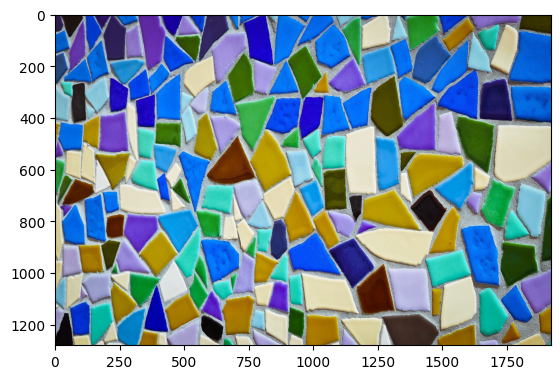

In [16]:

path="/content/drive/MyDrive/GRIP23_TASKS/IOT_COMPUTER_VISIO_TASK/sample_image.jpg"
image = cv2.imread(path)
#print("The type of this input is {}".format(type(image)))
#print("Shape: {}".format(image.shape()))
plt.imshow(image)

*  NOTE :
We can see that the image has different colors as compared to the original image. This is because by default OpenCV reads the images in the color order "Blue-Green-RED" i.e. BGR. Thus, we need to convert it into "RED GREEN BLUE" i.e. RGB.

# Converting BGR-To-RGB


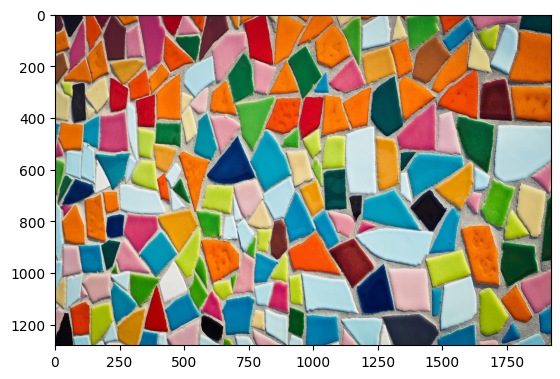

In [14]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

<b>Note: </b>
Now we need to convert RGB image to grayscale becuase in RGB image we have 3 channel so computer need more time and memory to understand what's inside image but with grayscale we only left with 2d array so it's easy for computer to understand

# converting BGR TO GREY

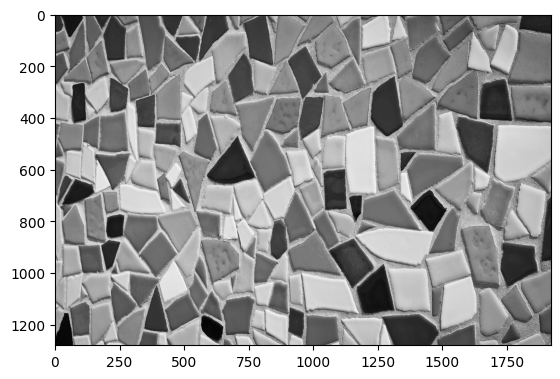

In [17]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

* <b>Note : </b>We need to resize the image to a certain size becuase we have images that are huge in size with different dimensions.

# Resizing Images


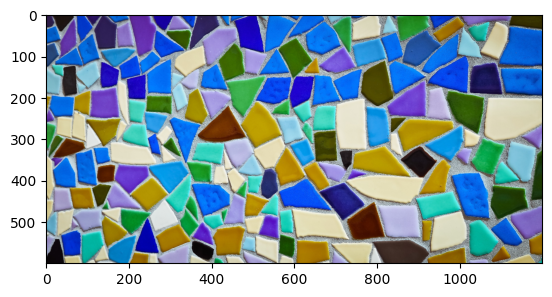

In [18]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

# Defining method for getting images & Conversion from BGR-TO-RGB

In [19]:
# load image and convert it to RGB
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Defining method for Conversion from RGB-TO-HEX


In [20]:
# define a function that will convert RGB to hex (get labels color for the output pie chart)
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

# Defining method for color identification method with along with K_Means Algorithm





In [21]:
# color identification method
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1],3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    if (show_chart):
        plt.figure(figsize=(10,20))
        plt.subplot(1,2,1)
        plt.imshow(image)
        plt.subplot(1,2,2)
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        plt.title("Color Identification", fontsize=25)
        return rgb_colors

# iddentify the colors of image 

[array([141.37466706,  35.72980172,  31.66410181]),
 array([133.89411334, 134.62754425, 127.71380872]),
 array([  5.86365565, 134.29446985, 169.85969544]),
 array([193.40258945, 218.396874  , 220.70066777]),
 array([14.88914756, 58.23532379, 59.10743802]),
 array([228.8578468 , 105.1923841 ,   6.06663915]),
 array([ 65.47062066, 151.45485613,  34.46643148]),
 array([192.70637845, 192.13912119,  46.8448618 ]),
 array([200.78086895, 179.13705595, 160.55291192]),
 array([191.69806974,  74.18722694, 108.88188101])]

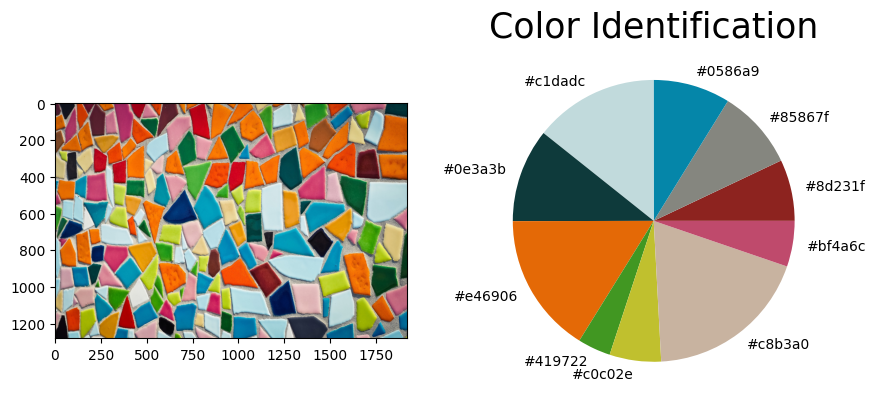

In [77]:
image_path="/content/drive/MyDrive/GRIP23_TASKS/IOT_COMPUTER_VISIO_TASK/sample_image.jpg"

get_colors(get_image(image_path), 10, True)

# importing images from directory

In [67]:
# color identification for a set of images in specific directory
IMAGE_DIRECTORY = r'/content/drive/MyDrive/GRIP23_TASKS/IOT_COMPUTER_VISIO_TASK/images'

images = []

COLORS = {'GREEN': [0, 128, 0],'BLUE': [0, 0, 128],'YELLOW': [255, 255, 0]}

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

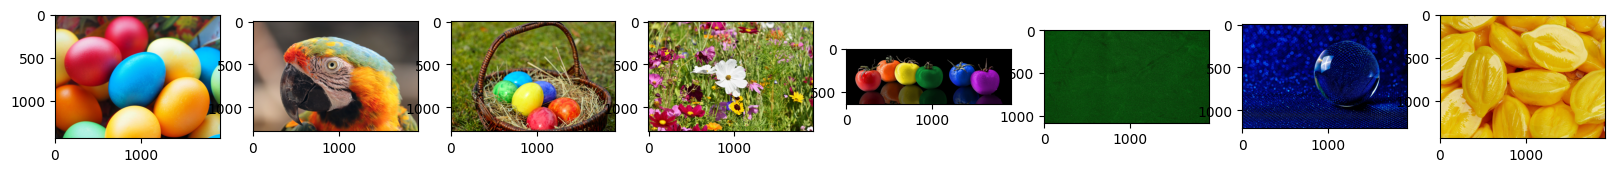

In [68]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [69]:
def show_colors(images):
    index = 1
    
    for i in range(len(images)):
        get_colors(images[i], 8, True)

# iddentify the images colore

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

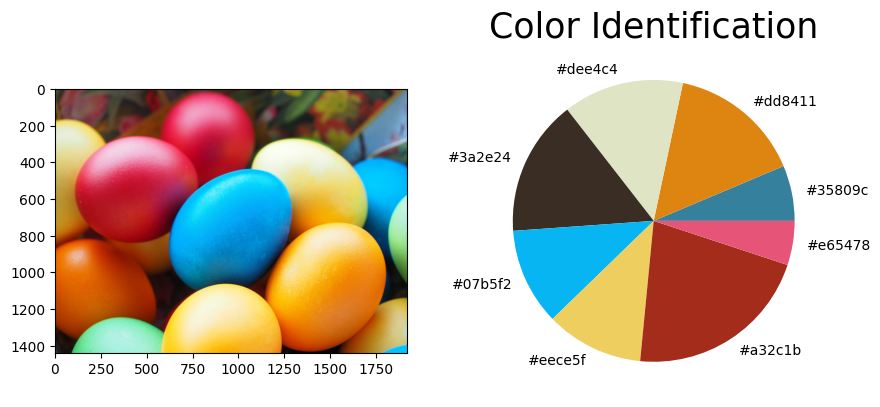

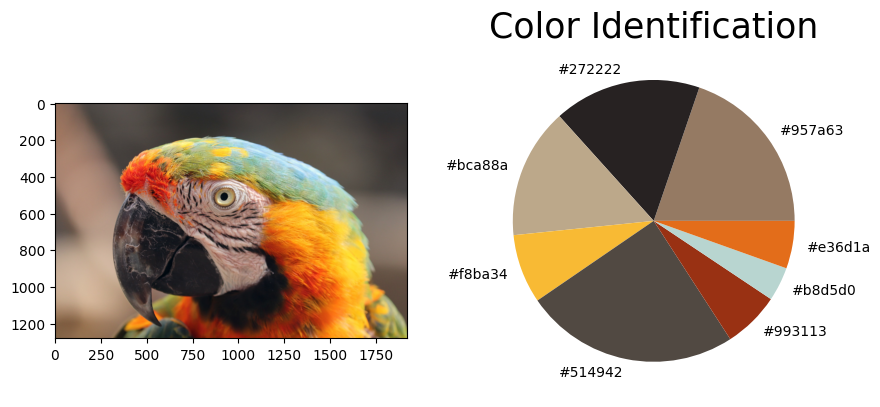

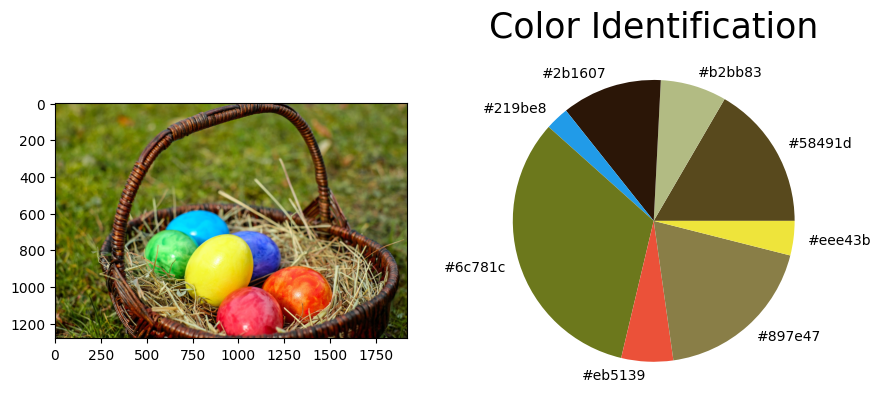

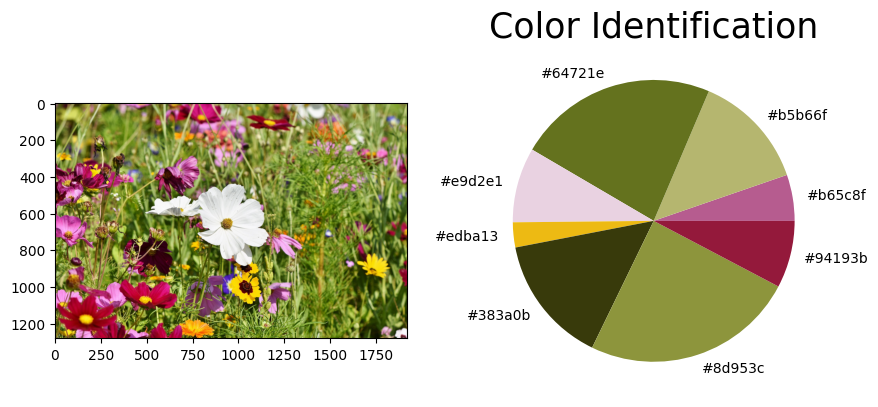

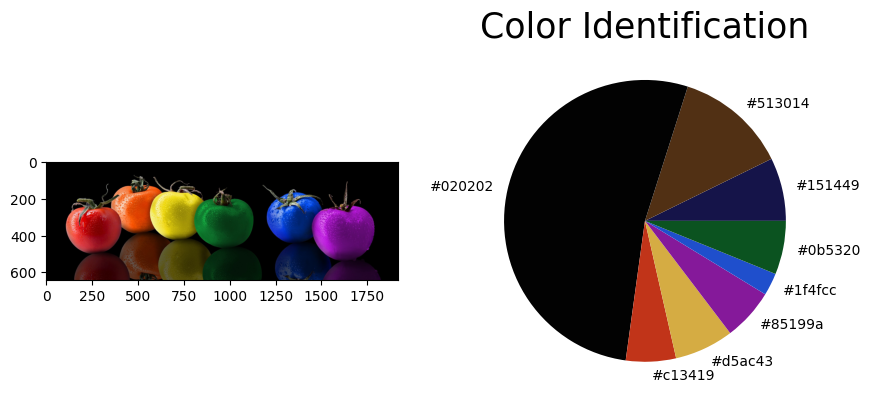

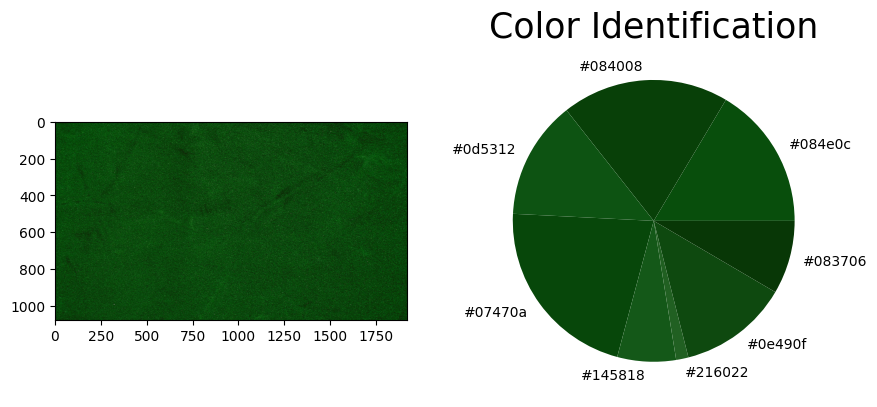

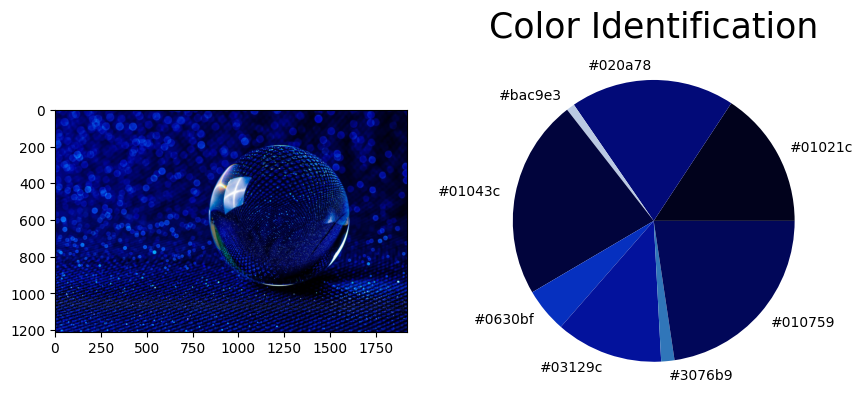

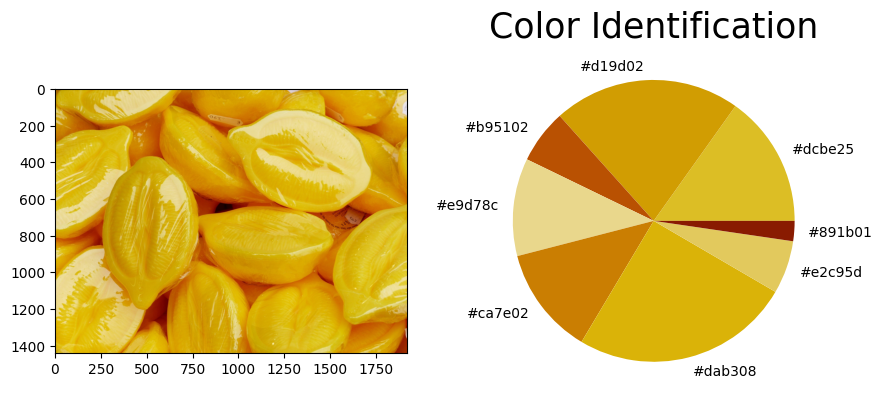

In [70]:
show_colors(images)


# Function for finding matches by using top 10 colors in images


In [61]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 8): 
    
    image_colors = get_colors1(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    
    for i in range(number_of_colors):
        
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        
        if (diff < threshold):
            select_image = True
    
    return select_image

#  Function for selection of images (Match/Mismatch)

In [62]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            plt.axis('off')
            index += 1

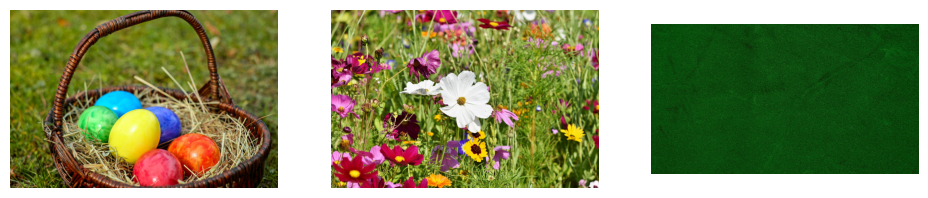

In [75]:
plt.figure(figsize = (20, 8))
show_selected_images(images, COLORS['GREEN'], 60, 5)

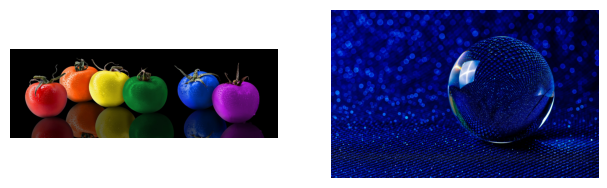

In [80]:
plt.figure(figsize = (20, 8))
show_selected_images(images, COLORS['BLUE'], 60, 4)

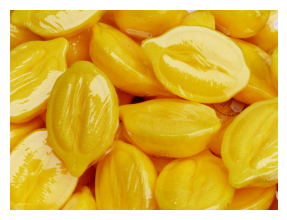

In [79]:
plt.figure(figsize = (20, 8))
show_selected_images(images, COLORS['YELLOW'], 60, 4)